<a href="https://colab.research.google.com/github/BaniMontoya/Social_network_distance/blob/main/Distance_between_Nodes_%7C_Test_for_Chiang_S_A_by_Bani_Montoya_25_02_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Una plataforma de Red Social, permite las siguientes operaciones a sus usuarios: post, follows, re-post

La plataforma provee a los desarrolladores de aplicaciones, el siguiente API:

 

GET /<username>/followers

 

{ "user": "username",  "Followers": ["user1", "user2",….. "user n"] }

 

GET /<username>/following

 

{ "user": "username",  "Following": ["user1", "user2",….. "user n"] }

 

 Implemente un algoritmo en cualquier lenguaje de programación, que calcule la distancia entre 2 usuarios.

 

Ejemplo:

 

Dado:

{ "user": "userA",  "Following": ["userB", "userD","userE", "userG"] }

{ "user": "userB",  "Following": ["userC", "userJ","userI", "userE"] }

{ "user": "userC",  "Following": ["userM", "userN","userJ", "userI", "userE"] }

     

SI requiero a distancia entre "userA" y "userM"

 

Al buscar se encuentra que: User A, sigue a User B. Y User B, sigue a User C. Y User C, sigue User M

 

Entonces, la distancia entre User A y User M, es: 3

 

CONSIDERAR: Sabemos de la existencia de respuestas en internet para esta pregunta, pero deseamos conocer su capacidad analítica para la resolución de este problema. Esperamos que el candidato tenga buenas habilidades en desarrollo de algoritmos para que pueda liderar al equipo técnico apropiadamente.



In [9]:
import pandas as pd
import numpy as np
following = [
  { "user": "userA",  "Following": ["userB", "userD","userE", "userG"] },
  { "user": "userB",  "Following": ["userC", "userJ","userI", "userE"] },
  { "user": "userC",  "Following": ["userM", "userN","userJ", "userI", "userE"] }
  ]
following_df = pd.DataFrame(following)
following_df

,user,Following
0,userA,"[userB, userD, userE, userG]"
1,userB,"[userC, userJ, userI, userE]"
2,userC,"[userM, userN, userJ, userI, userE]"


The distance between userA and userA is: 0
The distance between userA and userB is: 1
The distance between userA and userD is: 1
The distance between userA and userE is: 1
The distance between userA and userG is: 1
The distance between userA and userC is: 2
The distance between userA and userJ is: 2
The distance between userA and userI is: 2
The distance between userA and userM is: 3
The distance between userA and userN is: 3
The distance between userC and userM is: 1


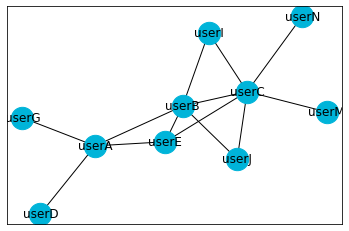

In [10]:
import networkx as nx
class Network:
  '''
  Network of followers
  '''
  followers_net = nx.Graph()
  def get_draw(self):
    '''
    Draw visualization of followers
    '''
    users = following_df['user']
    for user in users:
      for followeds in following_df.loc[following_df['user'] == user]['Following']:
        for followed in followeds:
          self.followers_net.add_edge(user,followed)
    nx.draw_networkx(self.followers_net,node_size=500, node_color='#00b4d9')
  def get_distance(self, user1, user2):
    '''
    Get short distance between user1 and user2
    '''
    users = following_df['user']
    for user in users:
      for followeds in following_df.loc[following_df['user'] == user]['Following']:
        for followed in followeds:
          self.followers_net.add_edge(user,followed)
    print( f"The distance between {user1} and {user2} is: {nx.shortest_path_length(self.followers_net, user1, user2)}")
    return nx.shortest_path_length(self.followers_net, user1, user2)

'''
Create Object Network
'''
net = Network()
'''
Get Visualization
'''
net.get_draw()
'''
Test net.get_distance() results
'''
assert net.get_distance("userA", "userA") == 0
assert net.get_distance("userA", "userB") == 1
assert net.get_distance("userA", "userD") == 1
assert net.get_distance("userA", "userE") == 1
assert net.get_distance("userA", "userG") == 1
assert net.get_distance("userA", "userC") == 2
assert net.get_distance("userA", "userJ") == 2
assert net.get_distance("userA", "userI") == 2
assert net.get_distance("userA", "userM") == 3
assert net.get_distance("userA", "userN") == 3
assert net.get_distance("userC", "userM") == 1